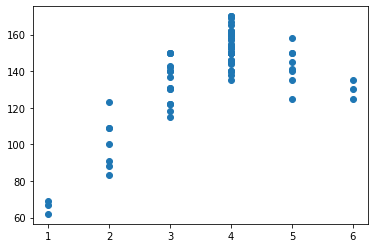

[73.24484048 -8.42672128 -7.00774851]


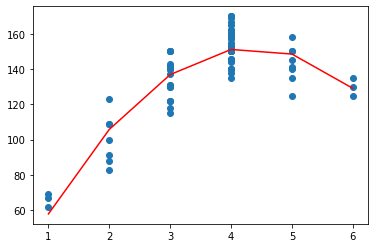

In [16]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_table('income.txt') # 탭으로 구분된 텍스트 파일로 읽어낼 수있음
df = df.dropna() # 빈칸이 있는 행 지우기
plt.scatter(df['age'],df['income'])
plt.show()

def 함수(x,a,b,c) :
  return a*x+ b*x**2 +c # **은 제곱


opt, cov = curve_fit(함수,df['age'],df['income']) # opt = a,b,c 
print(opt)
a,b,c = opt # 하나하나씩 들어있는걸 a b c 에 담음

import numpy as np
x = np.array([1,2,3,4,5,6])

plt.scatter(df['age'],df['income'])
plt.plot(x,함수(x,opt[0],opt[1],opt[2]), color= 'red')

plt.show()
# y = ax+bx^2+c


In [20]:
# polynomial regression w/sm

import statsmodels.api as sm

# x = [[첫나이,첫나이^2,상수],[둘나이,둘나이^2,1]] => 이유는 y = ax +bx^+c
x = np.column_stack( [ df['age'],df['age']**2 ])
model = sm.OLS(df['income'],x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              6671.
Date:                Mon, 24 May 2021   Prob (F-statistic):                    5.15e-87
Time:                        02:50:04   Log-Likelihood:                         -299.21
No. Observations:                  79   AIC:                                      602.4
Df Residuals:                      77   BIC:                                      607.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------